In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding='ISO-8859-1',low_memory=False)
mcq.shape # 행, 열

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 설문통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

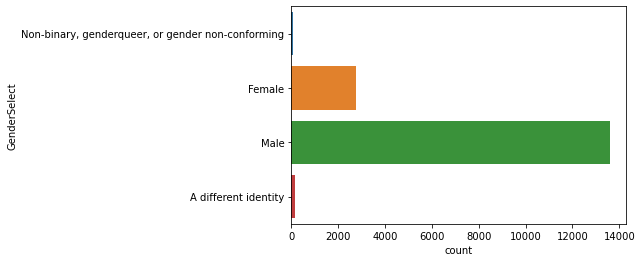

In [8]:
sns.countplot(data = mcq, y='GenderSelect')

In [9]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


In [10]:
con_df['국가'] = con_df.index # country컬럼을 국가로 컬러명 변경
con_df

,Country,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [11]:
con_df.columns = ['응답 수', '국가']
con_df

,응답 수,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [12]:
con_df = con_df.reset_index().drop('index', axis=1) # 인덱스를 초기화하고 1번 인덱스 제거

In [13]:
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [14]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

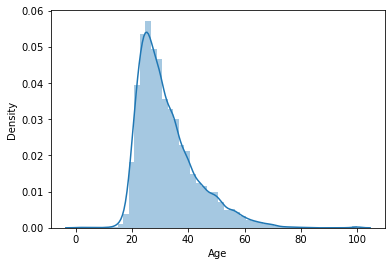

In [15]:
# 나이 distplot
sns.distplot(mcq[mcq['Age'] > 0]['Age']) # age가 0이 넘는 행들 조건

In [16]:
mcq

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

## 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

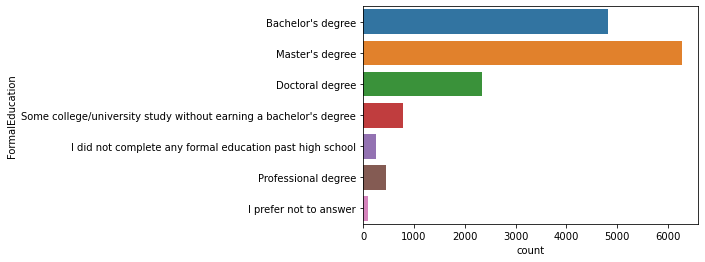

In [18]:
sns.countplot(y='FormalEducation',data=mcq)

## 전공

In [19]:
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())

mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))

mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)

mcq_major_df.columns = ['응답 수','비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

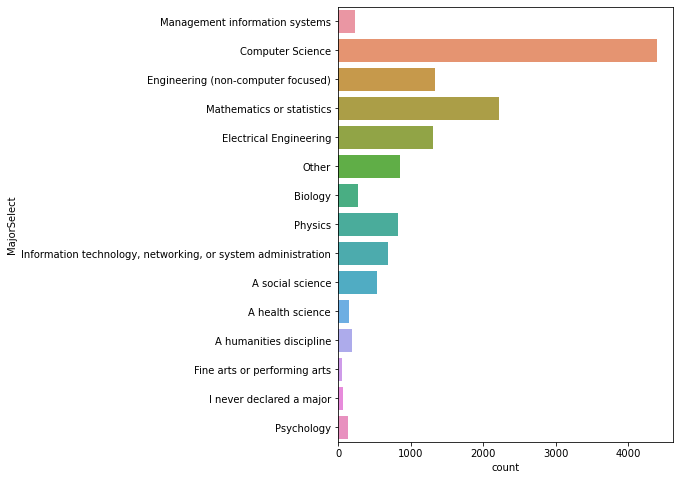

In [20]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(data=mcq, y='MajorSelect')

## 취업여부

In [21]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())

mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))

mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)

mcq_es_df.columns = ['응답 수','비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

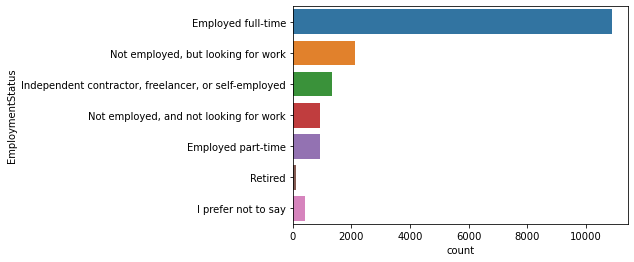

In [22]:
sns.countplot(data=mcq, y='EmploymentStatus')

## 프로그래밍 경험

<AxesSubplot:xlabel='count', ylabel='Tenure'>

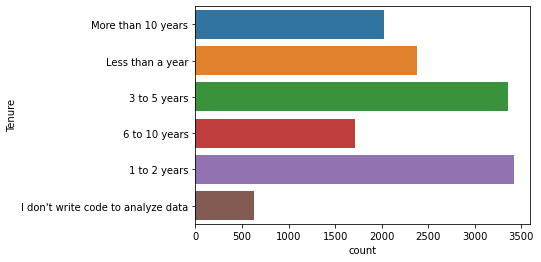

In [23]:
sns.countplot(data=mcq, y='Tenure')

## 한국 캐글러

The number of interviewees in Korea:194


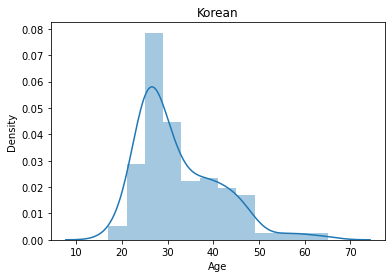

In [24]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea:' +str(korea.shape[0])) # 한국인 수 

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [25]:
korea['GenderSelect'].value_counts()

Male                    156
Female                   37
A different identity      1
Name: GenderSelect, dtype: int64

Text(0.5, 1.0, 'Korean')

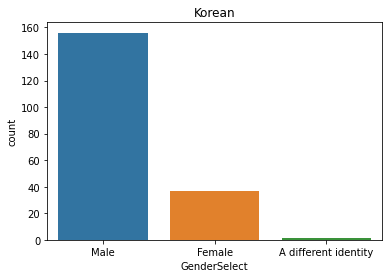

In [26]:
sns.countplot(data=korea, x='GenderSelect')
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

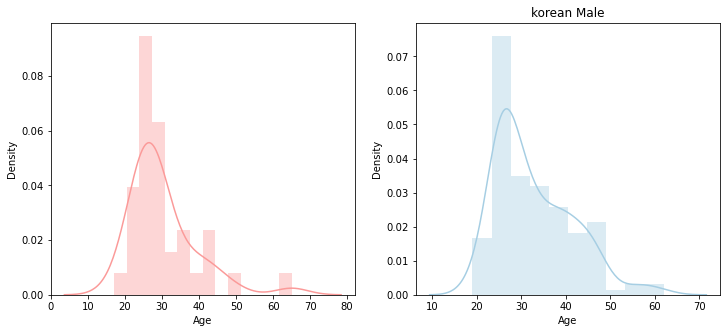

In [27]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color=sns.color_palette('Paired')[4],ax=ax1)
plt.title('korean Female')

plt.title('korean Female')
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color=sns.color_palette('Paired')[0],ax=ax2)
plt.title('korean Male')